In [1]:
import sys
sys.path.append('thyroid_disease_AI')
import pandas as pd #Para trabalhar com dataframes
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from utils import *

In [2]:
if __name__ == '__main__':

    # Carregando dataset
    dataset =  pd.read_csv('C:\\Users\\caiom\\Desktop\\Sist Hypo\\thyroid_disease_AI\\thyroid_disease_AI\\datasets\\hypothyroid\\hypothyroid_dataset_clean.csv')
    output_label_dataset = dataset['binaryClass']
    dataset = dataset.drop(['binaryClass'], axis=1)

    # Balanceando os dados
    dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
    
    # Dividindo os dados em 80% para treino e 20% para teste
    input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)

# Decision Tree Classifier

In [3]:
#Criando o modelo de árvore de decisão
model= DecisionTreeClassifier(criterion='gini', 
                              max_depth=None, 
                              max_features='sqrt', 
                              min_samples_leaf=2, 
                              min_samples_split=10, 
                              random_state=42, 
                              splitter='best')
model.fit(input_train, output_train) #Treinamento

# Treinando modelo
output_model_decision = model.predict(input_test)

In [4]:
accuracy(output_test, output_model_decision) # Pontuação de acurácia
    
precision(output_test, output_model_decision) # Pontuação de precisão

recall(output_test, output_model_decision) # Pontuação de recall

f1(output_test, output_model_decision) # Pontuação de F1


A acurácia é de:  0.9870782483847811
A precisão é de:  0.9909774436090225
A pontuação de recall é de:  0.9821162444113264
A pontuação de F1 é de:  0.9865269461077844


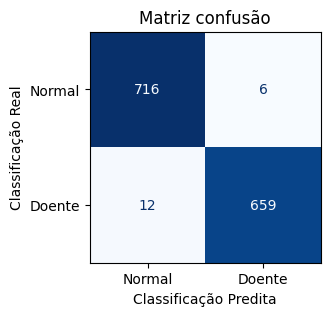

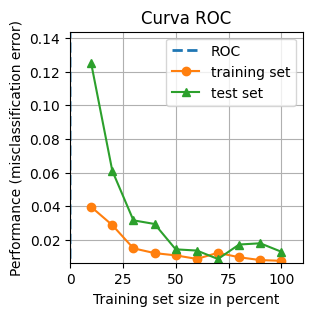

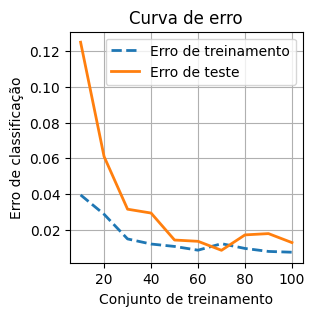

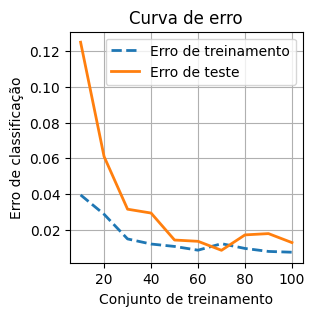

In [5]:
#Plotando a matriz de confusão
plot_confusion_matrix(output_test, output_model_decision, model, title='Matriz confusão')

# Plotando a curva ROC
roc(output_test, output_model_decision)

# Plotando a curva de erro
miss_classification(input_train, output_train, input_test, output_test, model)

# Extra Trees Classifier

In [6]:
#Criando o modelo
model = ExtraTreesClassifier(class_weight='balanced', 
                                criterion='entropy',
                                n_estimators=100, 
                                random_state=50,
                                max_depth = 15)
model.fit(input_train, output_train)

# Treinando modelo
output_model_decision = model.predict(input_test)

In [7]:
accuracy(output_test, output_model_decision) # Pontuação de acurácia
    
precision(output_test, output_model_decision) # Pontuação de precisão

recall(output_test, output_model_decision) # Pontuação de recall

f1(output_test, output_model_decision) # Pontuação de F1


A acurácia é de:  0.9928212491026561
A precisão é de:  0.9984917043740573
A pontuação de recall é de:  0.9865871833084948
A pontuação de F1 é de:  0.9925037481259371


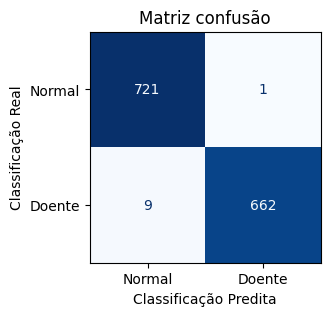

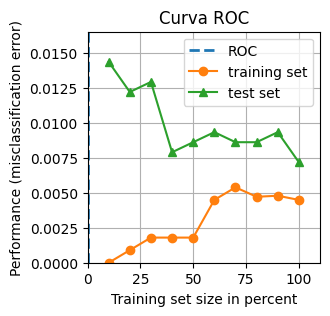

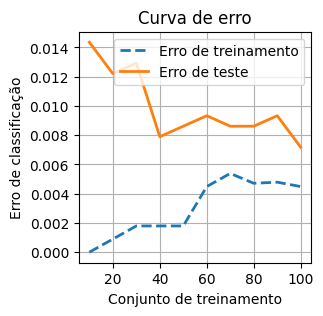

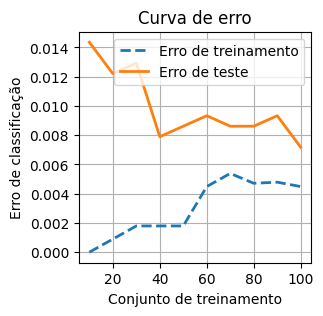

In [8]:
#Plotando a matriz de confusão
plot_confusion_matrix(output_test, output_model_decision, model, title='Matriz confusão')

# Plotando a curva ROC
roc(output_test, output_model_decision)

# Plotando a curva de erro
miss_classification(input_train, output_train, input_test, output_test, model)

# Gradient Boosting Classifier

In [9]:
#Criando o modelo
model= GradientBoostingClassifier(n_estimators=50,
                                      max_depth=5,
                                      random_state=42,
                                      subsample=0.9,
                                      max_features='sqrt')
model.fit(input_train, output_train)

# Treinando modelo
output_model_decision = model.predict(input_test)

In [10]:
accuracy(output_test, output_model_decision) # Pontuação de acurácia
    
precision(output_test, output_model_decision) # Pontuação de precisão

recall(output_test, output_model_decision) # Pontuação de recall

f1(output_test, output_model_decision) # Pontuação de F1


A acurácia é de:  0.9913854989231874
A precisão é de:  0.9984871406959153
A pontuação de recall é de:  0.9836065573770492
A pontuação de F1 é de:  0.990990990990991


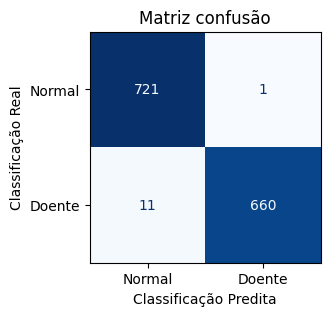

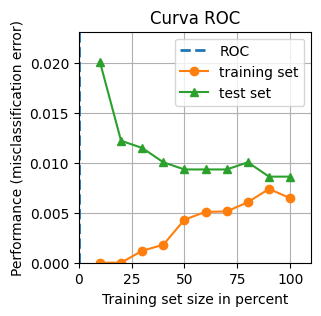

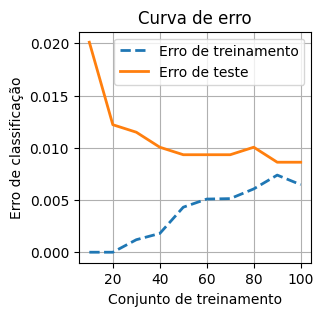

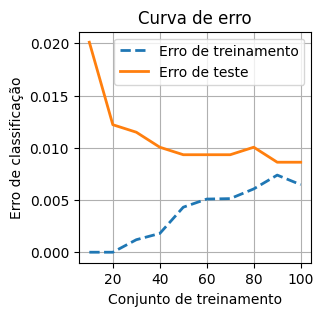

In [11]:
#Plotando a matriz de confusão
plot_confusion_matrix(output_test, output_model_decision, model, title='Matriz confusão')

# Plotando a curva ROC
roc(output_test, output_model_decision)

# Plotando a curva de erro
miss_classification(input_train, output_train, input_test, output_test, model)

# Light Gradient Boosting Machine

In [12]:
#Criando o modelo
model = lgb.LGBMClassifier(learning_rate = 0.3,
        max_depth = 15,
        n_estimators = 5,
        num_leaves = 15, 
        subsample = 0.5 
    )
model.fit(input_train, output_train)

# Treinando modelo
output_model_decision = model.predict(input_test)

[LightGBM] [Info] Number of positive: 2810, number of negative: 2759
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 5569, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504579 -> initscore=0.018316
[LightGBM] [Info] Start training from score 0.018316


In [13]:
accuracy(output_test, output_model_decision) # Pontuação de acurácia
    
precision(output_test, output_model_decision) # Pontuação de precisão

recall(output_test, output_model_decision) # Pontuação de recall

f1(output_test, output_model_decision) # Pontuação de F1


A acurácia é de:  0.9899497487437185
A precisão é de:  0.992503748125937
A pontuação de recall é de:  0.9865871833084948
A pontuação de F1 é de:  0.9895366218236173


[LightGBM] [Info] Number of positive: 273, number of negative: 283
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 556, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491007 -> initscore=-0.035975
[LightGBM] [Info] Start training from score -0.035975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 569, number of negative: 544
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Nu

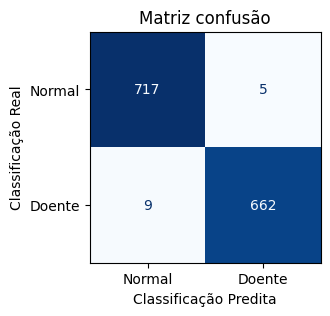

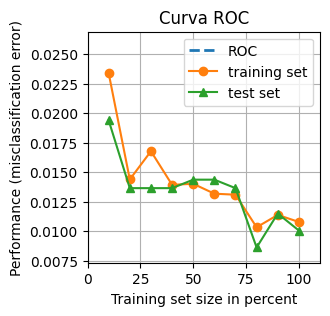

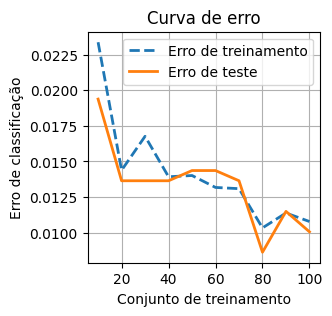

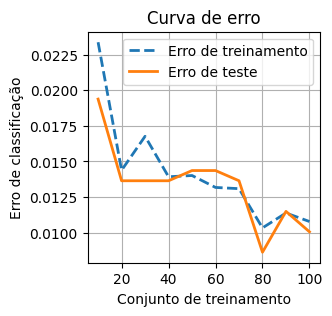

In [14]:
#Plotando a matriz de confusão
plot_confusion_matrix(output_test, output_model_decision, model, title='Matriz confusão')

# Plotando a curva ROC
roc(output_test, output_model_decision)

# Plotando a curva de erro
miss_classification(input_train, output_train, input_test, output_test, model)

# Random Forest Classifier

In [15]:
model = RandomForestClassifier(class_weight='balanced', 
                                criterion='entropy',
                                n_estimators=50, 
                                random_state=10
                                )
model.fit(input_train, output_train)

# Treinando modelo
output_model_decision = model.predict(input_test)

In [16]:
accuracy(output_test, output_model_decision) # Pontuação de acurácia
    
precision(output_test, output_model_decision) # Pontuação de precisão

recall(output_test, output_model_decision) # Pontuação de recall

f1(output_test, output_model_decision) # Pontuação de F1


A acurácia é de:  0.9928212491026561
A precisão é de:  1.0
A pontuação de recall é de:  0.9850968703427719
A pontuação de F1 é de:  0.9924924924924924


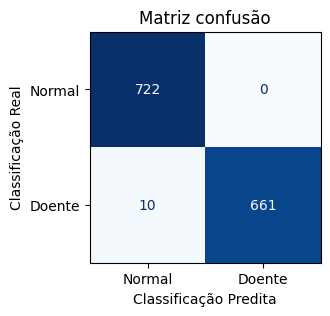

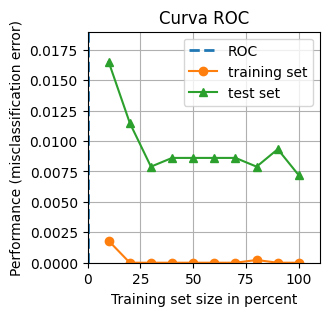

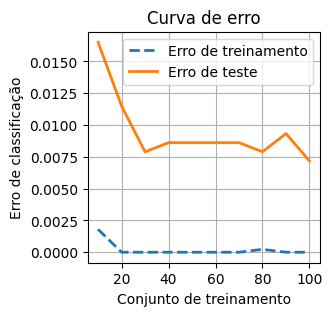

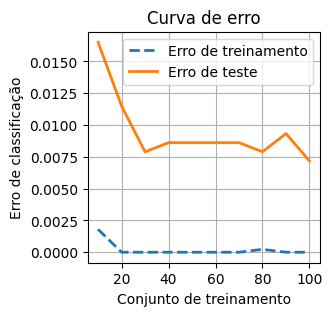

In [17]:
#Plotando a matriz de confusão
plot_confusion_matrix(output_test, output_model_decision, model, title='Matriz confusão')

# Plotando a curva ROC
roc(output_test, output_model_decision)

# Plotando a curva de erro
miss_classification(input_train, output_train, input_test, output_test, model)

# Extreme Gradient Boosting

In [18]:
model = XGBClassifier(
        colsample_bytree = 0.8,
        learning_rate = 0.01,
        max_depth = 3,
        n_estimators = 50,
        subsample = 0.8
        )
model.fit(input_train, output_train)

# Treinando modelo
output_model_decision = model.predict(input_test)

In [19]:
accuracy(output_test, output_model_decision) # Pontuação de acurácia
    
precision(output_test, output_model_decision) # Pontuação de precisão

recall(output_test, output_model_decision) # Pontuação de recall

f1(output_test, output_model_decision) # Pontuação de F1


A acurácia é de:  0.990667623833453
A precisão é de:  0.9984848484848485
A pontuação de recall é de:  0.9821162444113264
A pontuação de F1 é de:  0.9902329075882796


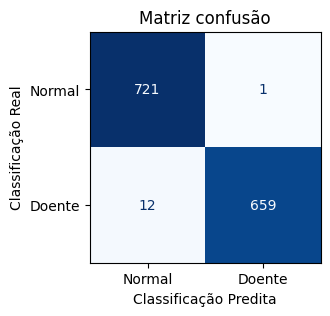

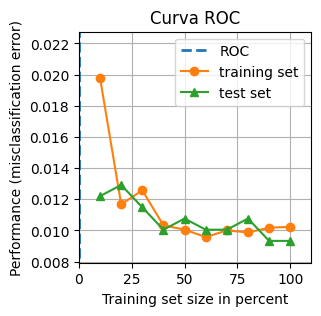

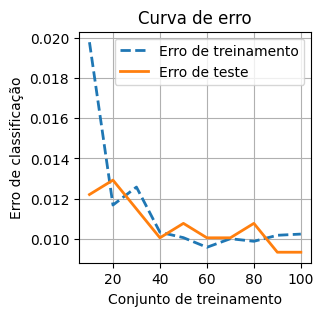

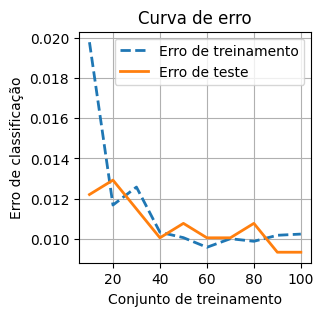

In [20]:
#Plotando a matriz de confusão
plot_confusion_matrix(output_test, output_model_decision, model, title='Matriz confusão')

# Plotando a curva ROC
roc(output_test, output_model_decision)

# Plotando a curva de erro
miss_classification(input_train, output_train, input_test, output_test, model)